![title](https://image.ibb.co/erDntK/logo2018.png)

---





# Task 10 - Keras Model


In this assignment you will practice in using and freezing the available pretrained model in Keras and using it for Transfer Learning later

The goals of this assignment are as follows:
* load empty VGG model
* load pretrained VGG model
* modifying VGG architectures
* freezing VGG layers

Write down your Name and Student ID

In [0]:
## --- start your code here ----

NIM = 1301160098
Nama = "Panji Bagaskara"

## --- end your code here ----

---
---
#[Part 0] Import Libraries and Load Data

---
## 1 - Install TensorFlow 2

If Tensorflow 2 is not already installed, install it first

In [2]:
!pip install tensorflow-gpu -q

     |████████████████████████████████| 380.8MB 43kB/s 
     |████████████████████████████████| 3.8MB 32.6MB/s 
     |████████████████████████████████| 450kB 49.2MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.


In [3]:
import tensorflow as tf
tf.__version__

'2.0.0'

**EXPECTED OUTPUT**:
<pre>
 '2.0.0'

---
## 2 - Import Libraries
Import required libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import backend as K
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import GlobalAveragePooling2D

%matplotlib inline
np.set_printoptions(precision=7)

---
## 3 - Helper Functions

Helper function to display the model's parameter

similar to &nbsp;`model.summary()` method

In [0]:
def print_params(model):
  
  def count_params(weights):
      """Count the total number of scalars composing the weights.
      # Arguments
          weights: An iterable containing the weights on which to compute params
      # Returns
          The total number of scalars composing the weights
      """
      weight_ids = set()
      total = 0
      for w in weights:
          if id(w) not in weight_ids:
              weight_ids.add(id(w))
              total += int(K.count_params(w))
      return total
  
  trainable_count = count_params(model.trainable_weights)
  non_trainable_count = count_params(model.non_trainable_weights)

  print('Total params: {:,}'.format(trainable_count + non_trainable_count))
  print('Trainable params: {:,}'.format(trainable_count))
  print('Non-trainable params: {:,}'.format(non_trainable_count))

---
---
# [Part 1] Using VGG16 model from Keras

Here we will demonstrate various ways to use the VGG model from Keras

The use of the model will be similar for other models provided by Keras

---
## 0 - Import model

First, import the &nbsp;**`keras.application`**&nbsp; module to use the predefined model

The format is similar for other models:
    
``` python
    from tensorflow.keras.application.model_name import ModelName
```

here, we'll use &nbsp;**`vgg16`**&nbsp;

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16

---
### Loading VGG Model Formats

The basic function for using the VGG16 architecture that has been defined from the Keras library is

```python
    model = VGG16( weights=??, include_top=??, pooling_name=??, input_shape=(??) )
```




There are several arguments we can enter when instantiating a model object

<br>

<table width=80%>
  <tr><td width=35%><font size=3><pre>weights = None</pre></font></td><td><font size=3> instantiates VGG16 with random weights</font></td></tr>
  <tr><td><font size=3><pre>weights = 'imagenet'</pre></font></td><td><font size=3>(default) - instantiates VGG16 with pre-trained weight <br>from ImageNet dataset</font></td></tr>

  <tr><td width=35%><font size=3><pre>include_top = True</pre></font></td><td><font size=3>(default) - fully instantiates VGG16 <br>from the Convolution layer to the FC layer</font> </td></tr>
  <tr><td><font size=3><pre>include_top = False</pre></font></td><td><font size=3>instantiates VGG16 only the Convolution layer, <br>without the last 3 FC layers</font></td></tr>
</table>

<br>
<br>


These arguments only applicable if &nbsp;&nbsp;<font color='red'>**`include_top = False`**</font>
<table width=80%>
  <tr><td width=35%><font size=3><pre>input_shape = ( ?, ?, ? )</pre></font></td><td width=2*><font size=3>instantiates VGG16 with a custom input size</font></td></tr>
  <tr><td><font size=3><pre>pooling_name = 'avg'
pooling_name = 'max'
pooling_name = None</pre></font></td><td><font size=3> instantiates VGG16 <br>with <b>Global Pooling Layer</b> output</font></td></tr>
</table>
<br>
<br>

This argument only applicable if&nbsp;&nbsp; <font color='red'>**`include_top = True`**</font>&nbsp;&nbsp; and&nbsp;&nbsp; <font color='red'>**`weights = None`</font>**
<table width=80%>
  <tr><td width=35%><font size=3><pre>classes = ?</pre></font></td><td><font size=3> instantiates whole VGG16 with custom class output</font></td></tr>
</table>
<br>
<br>


---
## 1 - Complete, Random
Load **full VGG16** with **random initialized** weights
<pre><b>* 16 layers (<font color='brown'>13 Conv</font> + <font color='green'>3 FC</font>)
* Random Initialized

* Input  ( None, 224, 224, 3 )
* Output ( None, 1000, )

---
#### <font color='red'>**EXERCISE:** </font>
<pre>call VGG16() function with <b>weights=None</b> alone
or with <b>weights=None</b> and <b>include_top=True</b>

In [7]:
model = VGG16(weights=None, include_top=True)


model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

**EXPECTED OUTPUT**:
<pre>
input_? (InputLayer)         [(None, 224, 224, 3)]     0         
...
predictions (Dense)          (None, 1000)              4097000   
=================================================================
Total params: 138,357,544
Trainable params: 138,357,544
Non-trainable params: 0

---
### Test New Image

The model is initialized with random weights, so if we try to test and predict an image, it'll classify the image into random class

Let's try it

We'll use the built in function to load and process the image, as well decode the prediction to retrive the predicted class

In [0]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

Let's download an image, you can change it url

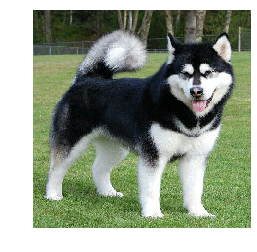

In [9]:
!wget -q -O 'new_image.jpg' 'https://i.pinimg.com/736x/95/d6/5c/95d65c7de6ddcad403aaf57c69ed7cd5.jpg'

img = image.load_img('new_image.jpg', target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()

next we convert the image into numpy array, then preprocess the input (mean centering from vgg16)

In [0]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

lastly, we predict the image and show the top three predictions

you'll see that the prediction is wrong

In [11]:
preds = model.predict(x)

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
print('Correct Answer: Malamute')

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n01692333', 'Gila_monster', 0.0019611637), ('n04296562', 'stage', 0.0018883348), ('n02100735', 'English_setter', 0.0018450194)]
Correct Answer: Malamute


---
## 2 - Complete, Random, Custom Output
Load **Full VGG16** with **random initialized** weights and output **10 class**

<pre><b>* 16 layers (<font color='brown'>13 Conv</font> + <font color='green'>3 FC</font>)
* Random Initialized

* Input  ( None, 224, 224, 3 )
* <font color='blue'>Output ( None, 10, )</font>

---
#### <font color='red'>**EXERCISE:** </font>
<pre>call VGG16() function with <b>include_top=True</b>, <b>weights=None</b>, and <b>classes=10</b>

In [12]:
model = VGG16(weights=None, include_top=True, classes=10)


model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

**EXPECTED OUTPUT**:
<pre>

input_? (InputLayer)         [(None, 224, 224, 3)]     0         
...
predictions (Dense)          (None, 10)                40970     
=================================================================
Total params: 134,301,514
Trainable params: 134,301,514
Non-trainable params: 0


---
## 3 - No Top, Random

Load VGG16 **without FC** layers with **random initialized** weights

<pre><b><font color='blue'>13 Conv layers</font>
Random Initialized

<font color='red'>Input  ( None, None, None, 3 )</font>        (<i>input size will have to be defined before using</i>)
<font color='red'>Output ( None, None, None, 512 )</font>      (<i>according to input</i>)

---
#### <font color='red'>**EXERCISE:** </font>
<pre>call VGG16() function with <b>include_top=False</b> and <b>weights=None</b>

In [13]:
model = VGG16(weights=None, include_top=False)

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

**EXPECTED OUTPUT**:
<pre>
input_? (InputLayer)         [(None, None, None, 3)]   0         
...
block5_pool (MaxPooling2D)   (None, None, None, 512)   0         
=================================================================
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0


---
## 4 - No Top, Random, Custom Input
Load VGG16 **without FC** layers with **random initialized** weights and **custom input** size
<pre><b><font color='blue'>13 Conv layers</font>
Random Initialized

<font color='blue'>Input  ( None, 32, 32,   3 )</font> 
<font color='red'>Output ( None,  1,  1, 512 )</font>      (<i>according to input</i>)

---
#### <font color='red'>**EXERCISE:** </font>
<pre>call VGG16() function with <b>include_top=False</b>,<b> weights=None</b>, and<b> input_shape=(32,32,3)</b>

In [14]:
model = VGG16(weights=None, include_top=False, input_shape=(32,32,3))

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

**EXPECTED OUTPUT**:
<pre>
input_? (InputLayer)         [(None, 32, 32, 3)]       0         
...
block5_pool (MaxPooling2D)   (None, 1, 1, 512)         0         
=================================================================
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0

---
## 5 - Complete, ImageNet
Load **full VGG16** with **pretrained weights** from ImageNet
<pre><b>16 layers (13 Conv + 3 FC)
<font color='blue'>ImageNet Pretrained</font>

Input  ( None,  224, 224, 3)
Output ( None, 1000, )

---
#### <font color='red'>**EXERCISE:** </font>
<pre>call VGG16() function with <b>include_top=True</b> and<b> weights='imagenet'</b>

In [15]:
# model size ~530MB
model = VGG16(weights='imagenet', include_top=True)

model.summary()

553467904/553467096 [==============================] - 38s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

**EXPECTED OUTPUT**:
<pre>
Downloading data from ...
553467904/553467096 [==============================] 

input_? (InputLayer)         [(None, 224, 224, 3)]     0         
...
predictions (Dense)          (None, 1000)              4097000   
=================================================================
Total params: 138,357,544
Trainable params: 138,357,544
Non-trainable params: 0

---
### Test New Image

the current model is initialized using vgg weights that have been trained in ImageNet reaching $94\%$ top-5 accuracy

now if we try to test and predict an image, it should produce the correct class (or at least close to it)

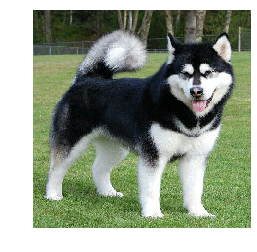

In [16]:
!wget -q -O 'new_image.jpg' 'https://i.pinimg.com/736x/95/d6/5c/95d65c7de6ddcad403aaf57c69ed7cd5.jpg'

img = image.load_img('new_image.jpg', target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()

In [0]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [18]:
preds = model.predict(x)

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
print('Correct Answer: Malamute')

Predicted: [('n02110063', 'malamute', 0.8522586), ('n02109961', 'Eskimo_dog', 0.08465861), ('n02110185', 'Siberian_husky', 0.061943464)]
Correct Answer: Malamute


---
### Test Another Image

Let's try another image that is really close to the previous image

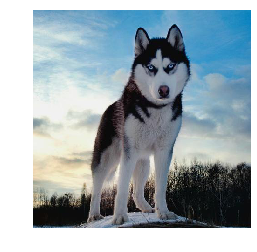

In [19]:
!wget -q -O 'new_image.jpg' 'https://cdn.shopify.com/s/files/1/0994/0236/files/siberian-husky_4217efb5-9130-4bdc-aa80-b274821bd05d_large.jpg?v=1518819764'

img = image.load_img('new_image.jpg', target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()

In [0]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [21]:
preds = model.predict(x)

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
print('Correct Answer: Siberian Husky')

Predicted: [('n02110185', 'Siberian_husky', 0.55032665), ('n02109961', 'Eskimo_dog', 0.43436548), ('n02110063', 'malamute', 0.013381198)]
Correct Answer: Siberian Husky


---
## 6 - No Top, ImageNet
Load VGG16 **without FC** layers with **pretrained weights** from ImageNet

<pre><b><font color='blue'>13 Conv layers</font>
<font color='blue'>ImageNet Pretrained</font>

<font color='red'>Input  ( None, None, None, 3 )</font>        (<i>input size will have to be defined before using</i>)
<font color='red'>Output ( None, None, None, 512 )</font>      (<i>according to input</i>)

---
#### <font color='red'>**EXERCISE:** </font>
<pre>call VGG16() function with <b>include_top=False</b> and<b> weights='imagenet'</b>

In [22]:
# model size ~57MB
model = VGG16(weights='imagenet', include_top=False)

model.summary()

58892288/58889256 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

**EXPECTED OUTPUT**:
<pre>
Downloading data from ...
58892288/58889256 [==============================]

input_? (InputLayer)         [(None, None, None, 3)]   0         
...
block5_pool (MaxPooling2D)   (None, None, None, 512)   0         
=================================================================
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0


---
## 7 - No Top, ImageNet, Custom Input
Load VGG16 **without FC** layers with **pretrained weights** from ImageNet and **custom input** size
<pre><b><font color='blue'>13 Conv layers</font>
<font color='blue'>ImageNet Pretrained</font>

<font color='blue'>Input  ( None, 32, 32,   3 )</font> 
<font color='red'>Output ( None,  1,  1, 512 )</font>      (<i>according to input</i>)

---
#### <font color='red'>**EXERCISE:** </font>
<pre>call VGG16() function with <b>include_top=False</b>,<b> weights='imagenet'</b>, and<b> input_shape=(32, 32, 3)</b> 

In [23]:
model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

**EXPECTED OUTPUT**:
<pre>
input_?  (InputLayer)        [(None, 32, 32, 3)]       0         
...
block5_pool (MaxPooling2D)   (None, 1, 1, 512)         0         
=================================================================
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0

---
## 8 - No Top, ImageNet, Global Pooling
Load VGG16 **without FC** layers with **pretrained weights** from ImageNet and add **Global Average Pooling** to the top
<pre><b><font color='blue'>13 Conv layers + Global Avg Pooling</font>
<font color='blue'>ImageNet Pretrained</font>

<font color='red'>Input  ( None, None, None, 3 )</font>     (<i>input size will have to be defined before using</i>)
<font color='blue'>Output ( None, 512 )</font>

---
#### <font color='red'>**EXERCISE:** </font>
<pre>call VGG16() function with <b>include_top=False</b>,<b> weights='imagenet'</b>, and<b> pooling='avg'</b> 

In [24]:
model = VGG16(weights='imagenet', include_top=False, pooling='avg')

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

**EXPECTED OUTPUT**:
<pre>
input_?  (InputLayer)        [(None, None, None, 3)]   0         
...
global_average_pooling2d (Gl (None, 512)               0         
=================================================================
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0

---
## 9 - No Top, ImageNet, Global Pooling, Custom Input
Load VGG16 **without FC** layers with **pretrained weights** from ImageNet, **custom input** size and add **Global Average Pooling** to the top
<pre><b><font color='blue'>13 Conv layers + Global Avg Pooling</font>
<font color='blue'>ImageNet Pretrained</font>

<font color='blue'>Input  ( None, 32, 32, 3 )</font> 
<font color='blue'>Output ( None, 512 )</font> 

---
#### <font color='red'>**EXERCISE:** </font>
<pre>call VGG16() function with <b>include_top=False</b>,<b> weights='imagenet'</b>,<b> input_shape=(32, 32, 3)</b>, and<b> pooling='avg'</b>

In [25]:
model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3), pooling='avg')

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

**EXPECTED OUTPUT**:
<pre>
input_?  (InputLayer)        [(None, 32, 32, 3)]       0         
...
global_average_pooling2d_? ( (None, 512)               0         
=================================================================
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0

---
---
# [Part 2] Modifying Full VGG16's Head
Here we will demonstrate various ways to modify the classification head from VGG16 architecture

The modification procedures will be similar for other models provided by Keras


The model inside Keras can be built and modified in two forms:   &nbsp;&nbsp;`Sequential` &nbsp;&nbsp;and&nbsp;&nbsp;` Functional`
<br>
* For the &nbsp;&nbsp;`Sequential` &nbsp;&nbsp;model, we can immediately delete the beginning or end of the layer by calling the&nbsp;&nbsp;` pop(id)`&nbsp;&nbsp;method.
<br>
* For the &nbsp;&nbsp;`Functional`&nbsp;&nbsp; model, modifying inputs and adding layers at the beginning or end can use the&nbsp;&nbsp;` Functional API`&nbsp;&nbsp;format. 


---
## 1 - Load Full VGG16

First, let's load the full VGG16 model



In [0]:
model = VGG16(include_top=True, weights='imagenet')

---
## 2 - List Layer Names
To see the entire name of the model, we can see by calling layer.name

In [27]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_10
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 flatten
20 fc1
21 fc2
22 predictions


---
## 3 - Using Sequential Model

First, let's see how to change the classification head using Sequential Model

---
### a. Prepare new Sequential Model

To modify the architecture, first we create a new empty model

we name the model &nbsp; `'myModel_full_1'`

In [0]:
myModel_F1 = Sequential(name='myModel_full_1')

---
### b. Add Full VGG16 into Sequential Model

Now we copy and add all layers from vgg architecture into our model

In [29]:
for layer in model.layers:
  myModel_F1.add(layer)
  
myModel_F1.summary()

Model: "myModel_full_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)    

**EXPECTED OUTPUT**:
<pre>
Model: "myModel_full_1"

block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
...
predictions (Dense)          (None, 1000)              4097000   
=================================================================
Total params: 138,357,544
Trainable params: 138,357,544
Non-trainable params: 0

you can see that the model is exact copy of vgg16

(the input layer is not shown)

In [30]:
for i, layer in enumerate(myModel_F1.layers):
    print(i, layer.name)

0 block1_conv1
1 block1_conv2
2 block1_pool
3 block2_conv1
4 block2_conv2
5 block2_pool
6 block3_conv1
7 block3_conv2
8 block3_conv3
9 block3_pool
10 block4_conv1
11 block4_conv2
12 block4_conv3
13 block4_pool
14 block5_conv1
15 block5_conv2
16 block5_conv3
17 block5_pool
18 flatten
19 fc1
20 fc2
21 predictions


---
### c. Test New Image

Just to make sure, let's test it

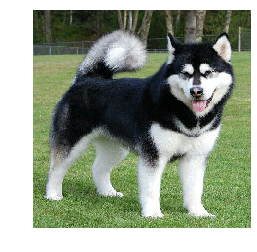

In [31]:
!wget -q -O 'new_image.jpg' 'https://i.pinimg.com/736x/95/d6/5c/95d65c7de6ddcad403aaf57c69ed7cd5.jpg'

img = image.load_img('new_image.jpg', target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()

In [0]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [33]:
preds = myModel_F1.predict(x)

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
print('Correct Answer: Malamute')

Predicted: [('n02110063', 'malamute', 0.8522586), ('n02109961', 'Eskimo_dog', 0.08465861), ('n02110185', 'Siberian_husky', 0.061943464)]
Correct Answer: Malamute


---
### d. Remove Top Layers
To delete the top layers, we can use the &nbsp;`pop()`&nbsp; function

for example, to get the same results as we instantiating the VGG16 model with the &nbsp;`include_top = False`&nbsp; argument, we must remove the **top 4 layers**&nbsp;
(`flatten, fc1, fc2 and prediction`)



In [0]:
x = myModel_F1.pop()
x = myModel_F1.pop()
x = myModel_F1.pop()
x = myModel_F1.pop()

Now let's list the remaining layers

In [35]:
for i, layer in enumerate(myModel_F1.layers):
    print(i, layer.name)

0 block1_conv1
1 block1_conv2
2 block1_pool
3 block2_conv1
4 block2_conv2
5 block2_pool
6 block3_conv1
7 block3_conv2
8 block3_conv3
9 block3_pool
10 block4_conv1
11 block4_conv2
12 block4_conv3
13 block4_pool
14 block5_conv1
15 block5_conv2
16 block5_conv3
17 block5_pool


---
### e. Add new Classifier Head

Recent popular architecture always use Global Average Pooling after the last conv/pool layer, so let's do that

Add a **Global Average Pool** layer and a couple of **Dense** layers with **10 class** output classification

You can add naming to the layer as shown in the prediction layer

In [36]:
myModel_F1.add(GlobalAveragePooling2D())
myModel_F1.add(Dense(1024, activation='relu'))
myModel_F1.add(Dense(10, activation='softmax', name='prediction_full_1'))

myModel_F1.summary()

Model: "myModel_full_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)    

**EXPECTED OUTPUT**:
<pre>
Model: "myModel_full_1"

block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
...

block5_pool (MaxPooling2D)   (None, 7, 7, 512)         0         
global_average_pooling2d_? ( (None, 512)               0         
dense (Dense)                (None, 1024)              525312    
prediction_full_1 (Dense)    (None, 10)                10250     
=================================================================
Total params: 15,250,250
Trainable params: 15,250,250
Non-trainable params: 0

---
## 4 - Using Functional API

Now we'll see how to do it using Functional API

---
### a. Select output layer

When using Functional API, we can simply select which layer we want to cut

For VGG16, we can see that the last block ('`block5_pool`') is at layer $17$

So we select that layer output as follow

In [0]:
x = model.layers[17].output

---
### b. Add new Classifier Head

Now to add a **Global Average Pool** layer and a couple of **Dense** layers with **10 class** output classification


In [0]:
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)

prediction = Dense(10, activation='softmax', name='prediction_full_2')(x)

---
### c. Instantiate Model

Lastly, we instantiate new Model from input vgg16 model to our `'prediction'` branch

Let's name it &nbsp;`'myModel_full_2'`

In [39]:
myModel_F2 = Model(inputs=model.input, outputs=prediction, name='myModel_full_2')
myModel_F2.summary()

Model: "myModel_full_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)    

**EXPECTED OUTPUT**:
<pre>
Model: "myModel_full_2"

input_?  (InputLayer)        [(None, 224, 224, 3)]     0 
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
...

block5_pool (MaxPooling2D)   (None, 7, 7, 512)         0         
global_average_pooling2d_? ( (None, 512)               0         
dense (Dense)                (None, 1024)              525312    
prediction_full_2 (Dense)    (None, 10)                10250     
=================================================================
Total params: 15,250,250
Trainable params: 15,250,250
Non-trainable params: 0

---
---
# [Part 3] Modifying VGG16 for CIFAR-10
You've seen two ways to modify a Keras model using &nbsp;`Sequential`&nbsp; and &nbsp;`Functional API`

Using &nbsp;`Sequential`&nbsp; model is slightly longer than using &nbsp;`Functional API`

Now we've modified the output class, yes, but the input size is still $224\times224$

If we want to use Transfer Learning to train our own dataset with different input size, like CIFAR-10, we need to change the input shape as well



---
## 1 - Load VGG16 CNN body (no top)

For that, let's start by loading VGG16 body (without classification head). 

To simplify things, let's also set the custom input and output pooling

---
#### <font color='red'>**EXERCISE:** </font>
<pre>call VGG16() function with <b>include_top=False</b>, <b>input_shape=(32, 32, 3)</b>, and<b> pooling='avg'</b>

In [0]:
model = VGG16(include_top=False, input_shape=(32,32,3), pooling='avg')


---
## 2 - Using Sequential Model

Like before, we'll try to modify the model first using Sequential Model

---
### a. Prepare new Sequential Model

Create a new empty model, and name the model &nbsp; `'myModel_cifar_1'`

---
#### <font color='red'>**EXERCISE:** </font>
<pre>Create new Sequential model with <b>name='myModel_cifar_1'</b>

In [0]:
myModel_C1 = Sequential(name='myModel_cifar_1')

---
### b. Add VGG16 body into Sequential Model

Now copy and add all layers from vgg architecture into our model

---
#### <font color='red'>**EXERCISE:** </font>
<pre>insert all layer from <b>model</b> into <b>myModel_C1</b>

In [42]:
for layer in (model.layers):
  myModel_C1.add(layer)
  
myModel_C1.summary()

Model: "myModel_cifar_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)     

**EXPECTED OUTPUT**:
<pre>
Model: "myModel_cifar_1"

block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
...
block5_pool (MaxPooling2D)   (None, 1, 1, 512)         0         
global_average_pooling2d_? ( (None, 512)               0         
=================================================================
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0

---
### c. Add new Classifier Head

Now to add a couple of **Dense** layers with $1024$ neuron and $10$ class output classification respectively

You **don't** have to add a **Global Average Pool** layer since we've already load VGG16 with pooling head

Name the classification head as &nbsp;**`'prediction_cifar_1'`**

---
#### <font color='red'>**EXERCISE:** </font>
<pre>add Dense 1024 with relu activation, 
and Dense 10 with softmax activation, set name='prediction_cifar_1'

In [43]:
myModel_C1.add(Dense(1024, activation='relu'))
myModel_C1.add(Dense(10, activation='softmax', name='prediction_cifar_1'))

myModel_C1.summary()

Model: "myModel_cifar_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)     

**EXPECTED OUTPUT**:
<pre>
Model: "myModel_cifar_1"
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
...
global_average_pooling2d_? ( (None, 512)               0         
dense_? (Dense)              (None, 1024)              525312    
prediction_cifar_1 (Dense)   (None, 10)                10250     
=================================================================
Total params: 15,250,250
Trainable params: 15,250,250
Non-trainable params: 0
_________________________________________________________________

---
## 3 - Using Functional API

Now let's try the same exact modification, but now using Functional API

---
### a. Select output layer

First, select the output layer

Since we're already loding VGG16 using global pooling and without classification head, we can simply set &nbsp;**`x`**&nbsp; to the model output

---
#### <font color='red'>**EXERCISE:** </font>
<pre>set <b>x = model.output</b>

In [44]:
x = model.output

print(x.name)

global_average_pooling2d_4/Identity:0


**EXPECTED OUTPUT**:
<pre>
global_average_pooling2d_?/Identity:0

---
### b. Add new Classifier Head

Then add a couple of **Dense** layers with $1024$ neuron and $10$ class output classification respectively

Again, you **don't** have to add a **Global Average Pool** layer since we've already load VGG16 with pooling head

Name the classification head as &nbsp;**`'prediction_cifar_2'`**

---
#### <font color='red'>**EXERCISE:** </font>
<pre>set x = Dense 1024 with relu activation that receive input from x, then
set prediction = Dense 10 with softmax activation that receive input from x, set name='prediction_cifar_2'

In [0]:
x = Dense(1024, activation='relu')(x)

prediction = Dense(10, activation='softmax', name='prediction_cifar_2')(x)


---
### c. Instantiate Model

Lastly, we instantiate the new model from input vgg16 model to our new classification head

set the model name as  ` 'myModel_cifar_2'`

---
#### <font color='red'>**EXERCISE:** </font>
<pre>instantiate Model with <b>inputs = model.input</b> and <b>outputs = prediction</b>,
set with <b>name='myModel_cifar_2'

In [46]:
myModel_C2 = Model(inputs=model.input, outputs=prediction, name='myModel_cifar_2')

myModel_C2.summary()

Model: "myModel_cifar_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)     

**EXPECTED OUTPUT**:
<pre>
Model: "myModel_cifar_2"
input_?  (InputLayer)        [(None, 32, 32, 3)]       0   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
...
global_average_pooling2d_? ( (None, 512)               0         
dense_? (Dense)              (None, 1024)              525312    
prediction_cifar_2 (Dense)   (None, 10)                10250     
=================================================================
Total params: 15,250,250
Trainable params: 15,250,250
Non-trainable params: 0
_________________________________________________________________

---
---
# [Part 4] Modifying Mini VGG16 for CIFAR-10
As mentioned in previous exercise, using full VGG16 for CIFAR-10 sized dataset leads to an output pool shape of $1\times1\times512$

which is too small (no spatial size)

Therefore, we might want to cut the vgg body, and only take the first half or so

So let's do that

---
## 1 - Load VGG16 CNN body (no top)

Again, let's load the VGG16 body without classification head.

Don't forget to set the custom input and output pooling

---
#### <font color='red'>**EXERCISE:** </font>
<pre>call VGG16() function with <b>include_top=False</b>, <b>input_shape=(32, 32, 3)</b>, and<b> pooling='avg'</b>

In [0]:
model = VGG16(include_top=False, input_shape=(32,32,3), pooling='avg')


---
## 2 - List Layer Names
First, let's look at the layers naming

In [48]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_12
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 global_average_pooling2d_5


For this mini version of vgg for cifar-10, let's cut the model up to &nbsp;**`'block4_conv3'`** or layer $13$

---
## 3 - Using Sequential Model

Again, let's try it first using Sequential Model

---
### a. Prepare new Sequential Model

Create a new empty model, and name the model &nbsp; `'myModel_mini_1'`

---
#### <font color='red'>**EXERCISE:** </font>
<pre>Create new Sequential model with <b>name='myModel_mini_1'</b>

In [0]:
myModel_M1 = Sequential(name='myModel_mini_1')


---
### b. Add several VGG16 layers into Sequential Model

Now copy and add layers from vgg architecture into our model.

You can either:

    a. copy and add all layers from model, then pop it back until the desired layer, or
    b. copy and add layers up to 'block4_conv3' or layer 13

---
#### <font color='red'>**EXERCISE:** </font>
<pre>insert layers from <b>model</b> into <b>myModel_M1</b> up to <b>'block4_conv3'</b> or <b>layer 13</b>

In [50]:
for i, layer in enumerate(model.layers):
  if i < 14:
    myModel_M1.add(layer)
  
myModel_M1.summary()

Model: "myModel_mini_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)      

**EXPECTED OUTPUT**:
<pre>
Model: "myModel_mini_1"
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
...
block4_conv2 (Conv2D)        (None, 4, 4, 512)         2359808   
block4_conv3 (Conv2D)        (None, 4, 4, 512)         2359808   
=================================================================
Total params: 7,635,264
Trainable params: 7,635,264
Non-trainable params: 0

---
### c. Add new Classifier Head

Now to add a **Global Average Pool** layer and a couple of **Dense** layers with $1024$ neuron and $10$ class output classification respectively

Name the classification head as &nbsp;**`'prediction_mini_1'`**



---
#### <font color='red'>**EXERCISE:** </font>
<pre>add Global Average Pooling 2D,
add Dense 1024 with relu activation, 
and add Dense 10 with softmax activation, set name='prediction_mini_1'

In [51]:
myModel_M1.add(GlobalAveragePooling2D())
myModel_M1.add(Dense(1024, activation='relu'))
myModel_M1.add(Dense(10, activation='softmax', name='prediction_mini_1'))

myModel_M1.summary()

Model: "myModel_mini_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)      

**EXPECTED OUTPUT**:
<pre>
Model: "myModel_mini_1"
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
...
block4_conv3 (Conv2D)        (None, 4, 4, 512)         2359808   
global_average_pooling2d_? ( (None, 512)               0         
dense_? (Dense)              (None, 1024)              525312    
prediction_mini_1 (Dense)    (None, 10)                10250     
=================================================================
Total params: 8,170,826
Trainable params: 8,170,826
Non-trainable params: 0

---
## 4 - Using Functional API

Now do the same using Functional API

---
### a. Select output layer

To select an output layer from vgg, you can either:

    a. select from the model.layer[] list as the example shown before, or
    b. use model.get_layer() function to select a layer by its name

---
#### <font color='red'>**EXERCISE:** </font>
<pre>set <b>x</b> to either <b>model.layer[13].output</b>
or <b>model.get_layer('block4_conv3').output</b> 

In [52]:
x = model.layers[13].output

print(x.name)

block4_conv3_13/Identity:0


**EXPECTED OUTPUT**:
<pre>
block4_conv3_?/Identity:0

---
### b. Add new Classifier Head

Then add a **Global Average Pool** layer and a couple of **Dense** layers with $1024$ neuron and $10$ class output classification respectively

Name the classification head as &nbsp;**`'prediction_mini_2'`**

---
#### <font color='red'>**EXERCISE:** </font>
<pre>set x = Global Average Pooling2D that receive input from x, then
set x = Dense 1024 with relu activation that receive input from x, and lastly
set prediction = Dense 10 with softmax activation that receive input from x, set name='prediction_mini_2'

In [0]:
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)

prediction = Dense(10, activation='softmax', name='prediction_mini_2')(x)


---
### c. Instantiate Model

Lastly, instantiate the new model from input vgg16 model to our new classification head

set the model name as  ` 'myModel_mini_2'`

---
#### <font color='red'>**EXERCISE:** </font>
<pre>instantiate Model with <b>inputs = model.input</b> and <b>outputs = prediction</b>,
set with <b>name='myModel_mini_2'

In [54]:
myModel_M2 = Model(inputs=model.input, outputs=prediction, name='myModel_mini_2')

myModel_M2.summary()

Model: "myModel_mini_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)      

**EXPECTED OUTPUT**:
<pre>
Model: "myModel_mini_2"
input_?  (InputLayer)        [(None, 32, 32, 3)]       0         
...
block4_conv3 (Conv2D)        (None, 4, 4, 512)         2359808   
global_average_pooling2d_? ( (None, 512)               0         
dense_? (Dense)              (None, 1024)              525312    
prediction_mini_2 (Dense)    (None, 10)                10250     
=================================================================
Total params: 8,170,826
Trainable params: 8,170,826
Non-trainable params: 0

---
# [Part 5] Freezing Model

When training a model using Transfer Learning, we can use all designed layers or just train several layers and freeze the rest

We can freeze layers by changing the boolean flag `trainable`. 

Frozen layers won't be updated during training

---
## 1 - List Layer Names
We'll use our previously defined model for cifar-10 &nbsp;`myModel_C1`

First, let's list the layer

In [55]:
for i, layer in enumerate(myModel_C1.layers):
    print(i, layer.name)

0 block1_conv1
1 block1_conv2
2 block1_pool
3 block2_conv1
4 block2_conv2
5 block2_pool
6 block3_conv1
7 block3_conv2
8 block3_conv3
9 block3_pool
10 block4_conv1
11 block4_conv2
12 block4_conv3
13 block4_pool
14 block5_conv1
15 block5_conv2
16 block5_conv3
17 block5_pool
18 global_average_pooling2d_4
19 dense_2
20 prediction_cifar_1


You should see that there are 15 million parameters (weights) to train, and all parameters are trainable

In [56]:
print_params(myModel_C1)

Total params: 15,250,250
Trainable params: 15,250,250
Non-trainable params: 0


---
## 2 - Freezing Conv Body

For this example, let's try to freeze the CNN body, since it's already trained on ImageNet, and only train the classification head

To do that, set the trainable of all layers up to layer $18$ to be `False`

In [0]:
for layer in myModel_C1.layers[:19]:
    layer.trainable = False

Now if we show the summary, you should see that there are $500$ thousands parameters to train, while the other $14$ million parameters are frozen.

In [58]:
myModel_C1.summary()

Model: "myModel_cifar_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)     

**EXPECTED OUTPUT**:
<pre>
Model: "myModel_cifar_1"

block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
...
block5_pool (MaxPooling2D)   (None, 1, 1, 512)         0         
global_average_pooling2d_? ( (None, 512)               0         
=================================================================
Total params: 15,250,250
Trainable params: 535,562
Non-trainable params: 14,714,688

---
## 3 - Freezing Several Layers

In case of small dataset to train, you might want to freeze less layer and train more of them.

For this exercise, let's freeze layers from &nbsp;**`myModel_C2`**&nbsp; up to <b>`'block4_pool'`</b> or layer <b>$14$</b>

---
#### <font color='red'>**EXERCISE:** </font>
<pre>freeze layer up to <b>'block4_pool'</b> or <b>layer 14</b>

In [0]:
 for layer in (myModel_C2.layers[:15]):
    layer.trainable = False

Now if we show the summary, you should get $7$ million parameters to train, and another $7$ million parameters frozen.

In [60]:
myModel_C2.summary()

Model: "myModel_cifar_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)     

**EXPECTED OUTPUT**:
<pre>
Model: "myModel_cifar_2"
input_?  (InputLayer)        [(None, 32, 32, 3)]       0         
...
dense_? (Dense)              (None, 1024)              525312    
prediction_cifar_2 (Dense)   (None, 10)                10250     
=================================================================
Total params: 15,250,250
Trainable params: 7,614,986
Non-trainable params: 7,635,264

let's print the layer name and its trainable status

In [61]:
print('trainable : layer name')
print('-------------------------------')
for i, layer in enumerate(myModel_C2.layers):
    print(layer.trainable,'\t  :', i, layer.name)

trainable : layer name
-------------------------------
False 	  : 0 input_11
False 	  : 1 block1_conv1
False 	  : 2 block1_conv2
False 	  : 3 block1_pool
False 	  : 4 block2_conv1
False 	  : 5 block2_conv2
False 	  : 6 block2_pool
False 	  : 7 block3_conv1
False 	  : 8 block3_conv2
False 	  : 9 block3_conv3
False 	  : 10 block3_pool
False 	  : 11 block4_conv1
False 	  : 12 block4_conv2
False 	  : 13 block4_conv3
False 	  : 14 block4_pool
False 	  : 15 block5_conv1
False 	  : 16 block5_conv2
False 	  : 17 block5_conv3
False 	  : 18 block5_pool
False 	  : 19 global_average_pooling2d_4
True 	  : 20 dense_3
True 	  : 21 prediction_cifar_2


**EXPECTED OUTPUT**:
<pre>
trainable : layer name
-------------------------------
False     : 0 input_?
False     : 1 block1_conv1
False     : 2 block1_conv2
False     : 3 block1_pool
False     : 4 block2_conv1
False     : 5 block2_conv2
False     : 6 block2_pool
False     : 7 block3_conv1
False     : 8 block3_conv2
False     : 9 block3_conv3
False     : 10 block3_pool
False     : 11 block4_conv1
False     : 12 block4_conv2
False     : 13 block4_conv3
False     : 14 block4_pool
True      : 15 block5_conv1
True      : 16 block5_conv2
True      : 17 block5_conv3
True      : 18 block5_pool
True      : 19 global_average_pooling2d_?
True      : 20 dense_?
True      : 21 prediction_cifar_2


---

# Congratulation, You've Completed Exercise 10

<p>Copyright &copy;  <a href=https://www.linkedin.com/in/andityaarifianto/>2019 - ADF</a> </p>

![footer](https://image.ibb.co/hAHDYK/footer2018.png)